# 정상성

In [4]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

## 1. 데이터 탐색 및 전처리

`asfreq`: pandas Period 객체를 원하는 주기(Period frequency)로 변환

In [5]:
data = pd.read_csv('../input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


확인해보면 날짜와 시간이 다른 열로 분리되어 있는데 이를 합쳐준다.<br>
(반복문으로 행 하나씩 변경해주었는데 이보다 더 효율적인 방법이 있을 것 같다..)

In [7]:
data['datetime'] = pd.to_datetime(data['Date'])
for i in range(len(data['Hour'])):
    data['datetime'][i] = data['datetime'][i] + timedelta(hours=int(data['Hour'][i]))
data.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,datetime
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 00:00:00
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 01:00:00
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 02:00:00
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 03:00:00
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 04:00:00


**데이터 타입 변환**

object 형태로 되어 있는 datetime 컬럼을 datetime으로 변환하고 인덱스로 넣어준다.

In [8]:
data.set_index('datetime', inplace=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
datetime,,,,,,,,,,,,,,
2017-01-12 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**주기 단위 설정**

시간을 기준으로 행 인덱스를 설정한다

In [9]:
data.index

DatetimeIndex(['2017-01-12 00:00:00', '2017-01-12 01:00:00',
               '2017-01-12 02:00:00', '2017-01-12 03:00:00',
               '2017-01-12 04:00:00', '2017-01-12 05:00:00',
               '2017-01-12 06:00:00', '2017-01-12 07:00:00',
               '2017-01-12 08:00:00', '2017-01-12 09:00:00',
               ...
               '2018-11-30 14:00:00', '2018-11-30 15:00:00',
               '2018-11-30 16:00:00', '2018-11-30 17:00:00',
               '2018-11-30 18:00:00', '2018-11-30 19:00:00',
               '2018-11-30 20:00:00', '2018-11-30 21:00:00',
               '2018-11-30 22:00:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8760, freq=None)

In [10]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [11]:
data.sort_index(inplace = True)

In [12]:
data = data.asfreq('H', method='ffill')

<AxesSubplot:xlabel='datetime'>

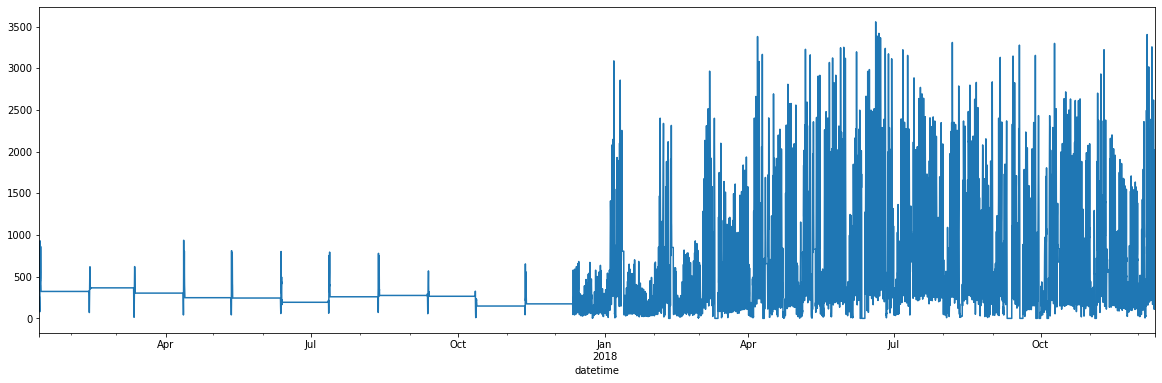

In [13]:
data['Rented Bike Count'].plot(kind='line', figsize=(20,6))

## 2. 정상성 변환

차분을 통해 비정상 시계열을 정상적 시계열로 변환해준다.

### 2-1. 로그변환

로그변환을 통해 큰 값은 작게, 작은 값은 크게 조정한다.

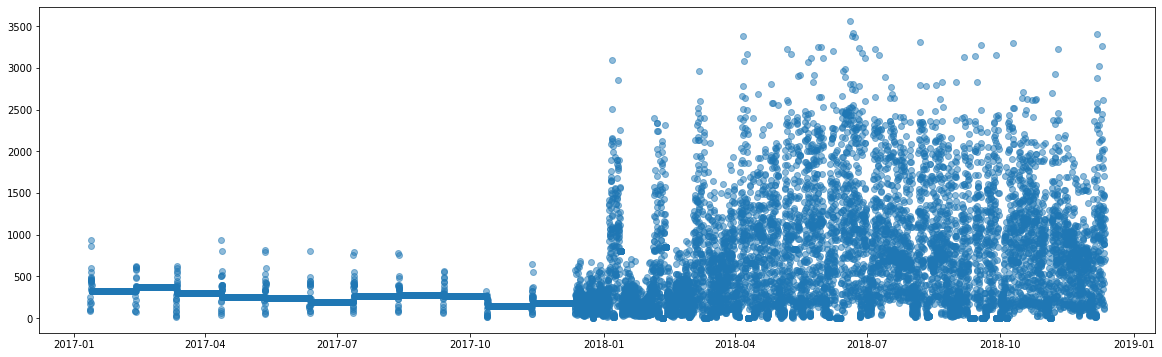

In [15]:
plt.figure(figsize=(20, 6))
plt.scatter(data.index, data['Rented Bike Count'],alpha=0.5)

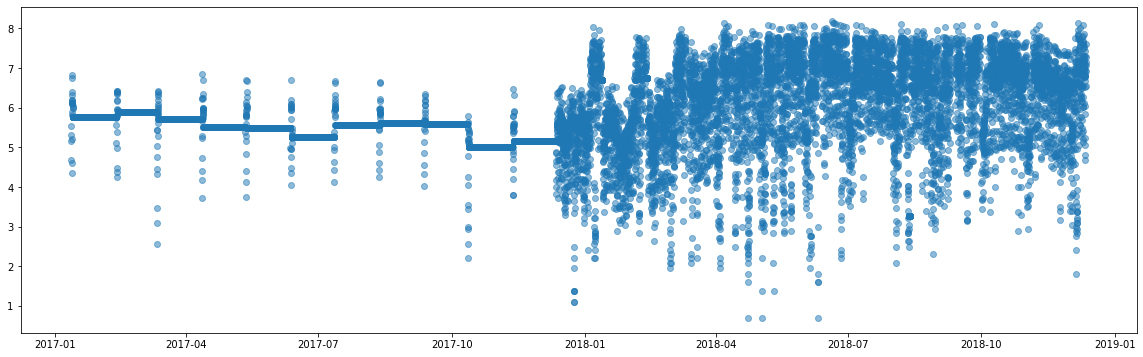

In [17]:
cnt = np.log(data['Rented Bike Count'])
plt.figure(figsize=(20, 6))
plt.scatter(data.index, cnt,alpha=0.5)

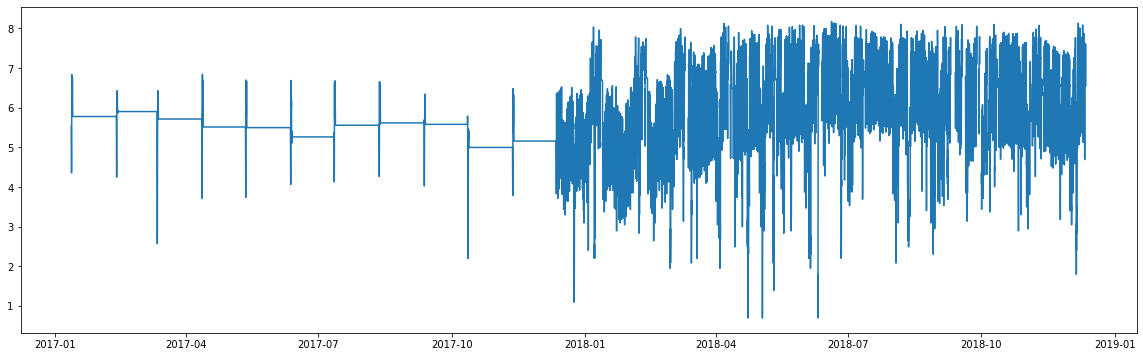

In [19]:
plt.figure(figsize=(20, 6))
plt.plot(data.index, cnt)
plt.show()

### 2-2. 차분

현재 시점의 데이터에서 인접 시점의 데이터를 차감하는 차분을 진행한다.

**차분 - np.diff(data) 방법**

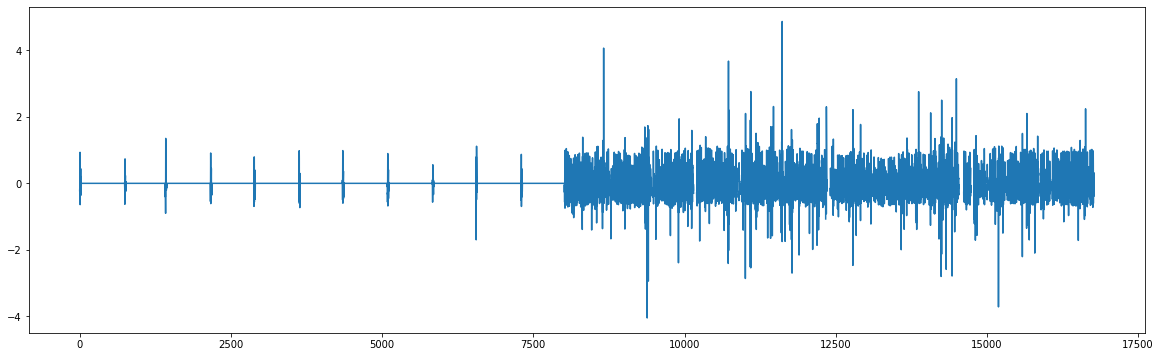

In [20]:
cnt_diff = np.diff(cnt)
plt.figure(figsize=(20, 6))
plt.plot(cnt_diff) 
plt.show()

**차분 - data.diff() 방법**

차분을 하면 빈 값이 생기므로 그 전의 데이터로 채워준다.

In [21]:
cnt_diff = cnt.diff()
cnt_diff.fillna(method='bfill', inplace=True)
cnt_diff

datetime
2017-01-12 00:00:00   -0.219214
2017-01-12 01:00:00   -0.219214
2017-01-12 02:00:00   -0.164828
2017-01-12 03:00:00   -0.480463
2017-01-12 04:00:00   -0.316120
                         ...   
2018-12-11 19:00:00   -0.321550
2018-12-11 20:00:00   -0.126346
2018-12-11 21:00:00   -0.083079
2018-12-11 22:00:00   -0.150373
2018-12-11 23:00:00   -0.376561
Freq: H, Name: Rented Bike Count, Length: 16776, dtype: float64

In [22]:
cnt_diff.columns = ['count_diff']

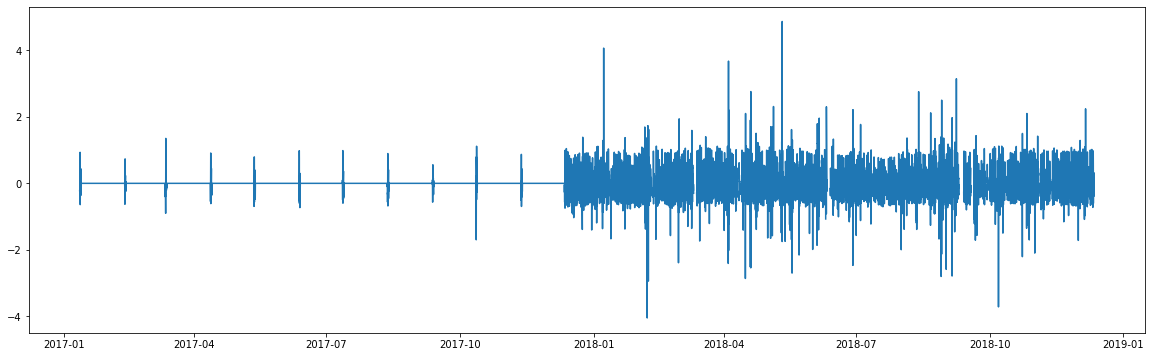

In [23]:
plt.figure(figsize=(20, 6))
plt.plot(data.index, cnt_diff)
plt.show()